# Transform datetime format

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'humidity.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert the first column to datetime and format it
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d%H%M').dt.strftime('%Y-%m-%d %H:%M:%S')

# Save the updated DataFrame back to the original CSV file
df.to_csv(file_path, index=False)

# Optionally, print the first few rows to verify the changes
print("\nUpdated Data:")
print(df.head())

C:\Users\cooki\AppData\Local\Temp\ipykernel_13780\2742441459.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0          2023-12-31 23:50:00
1          2023-12-31 23:50:00
2          2023-12-31 23:50:00
3          2023-12-31 23:50:00
4          2023-12-31 23:50:00
                  ...         
1587685    2025-02-28 23:10:00
1587686    2025-02-28 23:10:00
1587687    2025-02-28 23:10:00
1587688    2025-02-28 23:10:00
1587689    2025-02-28 23:10:00
Name: Date time, Length: 1587690, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d%H%M').dt.strftime('%Y-%m-%d %H:%M:%S')



Updated Data:
             Date time Automatic Weather Station  Relative Humidity(percent)
0  2023-12-31 23:50:00              Chek Lap Kok                        66.0
1  2023-12-31 23:50:00               Cheung Chau                        76.0
2  2023-12-31 23:50:00           Clear Water Bay                        84.0
3  2023-12-31 23:50:00            HK Observatory                        73.0
4  2023-12-31 23:50:00                   HK Park                        75.0


# Missing Values

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'averaged_humidity.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

humidity_null_counts = df[df["Relative Humidity(percent)"].isnull()] \
    .groupby(df.iloc[:, 0]) \
    .size() \
    .reset_index(name='Humidity Null Count')

print("\nCount of Null Values for Relative Humidity by Automatic Water Station:")
print(humidity_null_counts)


Count of Null Values for Relative Humidity by Automatic Water Station:
                Station  Humidity Null Count
0          Chek Lap Kok                    3
1           Cheung Chau                   52
2       Clear Water Bay                   12
3               HK Park                  201
4   Kai Tak Runway Park                  140
5          Kau Sai Chau                  128
6          Kowloon City                    4
7          Lau Fau Shan                  236
8         Pak Tam Chung                  117
9             Peng Chau                    5
10             Sai Kung                   22
11              Sha Tin                  195
12         Shau Kei Wan                   37
13            Shek Kong                   10
14          Sheung Shui                   26
15          Ta Kwu Ling                   55
16             Tai Lung                  302
17               Tai Po                    5
18        Tseung Kwan O                   35
19             Tsing Yi     

In [7]:
# Load the data
file_path = 'averaged_humidity.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Interpolate only missing values in the specified columns
data['Relative Humidity(percent)'] = data['Relative Humidity(percent)'].interpolate()

# Save the updated DataFrame back to the original file
data.to_csv(file_path, index=False)

print("Original file has been updated with interpolated values.")

Original file has been updated with interpolated values.


In [9]:
# Load the CSV file into a DataFrame
file_path = 'averaged_humidity.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

humidity_null_counts = df[df["Relative Humidity(percent)"].isnull()] \
    .groupby(df.iloc[:, 0]) \
    .size() \
    .reset_index(name='Humidity Null Count')

print("\nCount of Null Values for Relative Humidity by Automatic Water Station:")
print(humidity_null_counts)


Count of Null Values for Relative Humidity by Automatic Water Station:
Empty DataFrame
Columns: [Station, Humidity Null Count]
Index: []


67.16666666666667
89.83333333333333


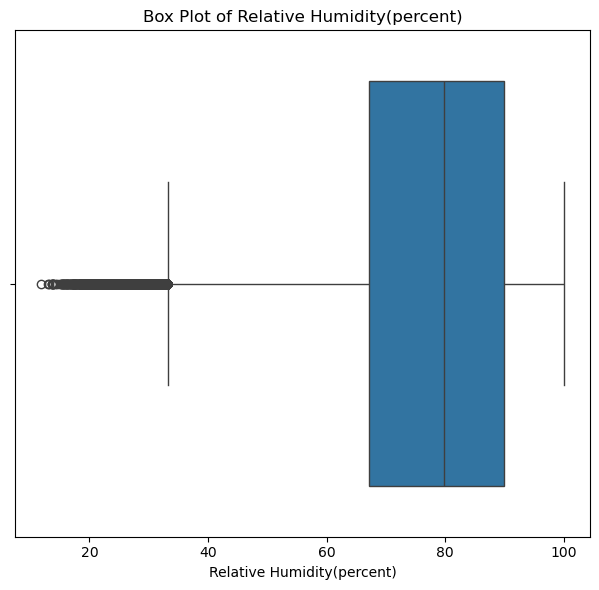

Outliers in Relative Humidity(percent):
               Station                 Hour  Relative Humidity(percent)  \
301       Chek Lap Kok  2024-01-13 11:00:00                   32.166667   
303       Chek Lap Kok  2024-01-13 13:00:00                   31.833333   
304       Chek Lap Kok  2024-01-13 14:00:00                   29.666667   
305       Chek Lap Kok  2024-01-13 15:00:00                   26.500000   
306       Chek Lap Kok  2024-01-13 16:00:00                   21.166667   
...                ...                  ...                         ...   
263977  Wong Chuk Hang  2025-02-09 11:00:00                   30.833333   
263978  Wong Chuk Hang  2025-02-09 12:00:00                   29.333333   
263979  Wong Chuk Hang  2025-02-09 13:00:00                   31.500000   
263980  Wong Chuk Hang  2025-02-09 14:00:00                   33.000000   
263981  Wong Chuk Hang  2025-02-09 15:00:00                   33.166667   

        Outlier Relative Humidity(percent)  
301           

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'averaged_humidity.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_hu = data['Relative Humidity(percent)'].quantile(0.25)
Q3_hu = data['Relative Humidity(percent)'].quantile(0.75)
IQR_hu = Q3_hu - Q1_hu

print(Q1_hu)
print(Q3_hu)

# Determine outlier bounds
lower_bound_hu = Q1_hu - 1.5 * IQR_hu
upper_bound_hu = Q3_hu + 1.5 * IQR_hu

# Identify outliers
data['Outlier Relative Humidity(percent)'] = ((data['Relative Humidity(percent)'] < lower_bound_hu) | 
                             (data['Relative Humidity(percent)'] > upper_bound_hu))

# Visualize with box plots
plt.figure(figsize=(12, 6))

# Box plot for Average Max Temp
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Relative Humidity(percent)'])
plt.title('Box Plot of Relative Humidity(percent)')
plt.xlabel('Relative Humidity(percent)')

plt.tight_layout()
plt.show()

# Optionally, print outliers
print("Outliers in Relative Humidity(percent):")
print(data[data['Outlier Relative Humidity(percent)']])